In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../Tables/pred_asses.csv')



In [3]:
data

,Unnamed: 0,GRD_INSPIR,NDVI,LST,WATER,ROADS,URBAN_GREENERY,OTHER,EXTRACTION_SITES,OPEN_SPACE_COMMERCIAL,...,DIST_COAST,X,Y,DOY,Year,BUILDING SURFACE,IMPERVIOUS SURFACE,PERVIOUS SURFACE,BUILT_UP,pred_lst
0,897922,1kmN6480E0540,0.845679,23.50,0.0550,1.3950,0.0,8.1550,0.0,0.0000,...,13798.984520,540500.0,6480500.0,214,2014,0.0725,2.7025,97.1700,0.0725,24.719055
1,363215,1kmN6420E0529,0.862189,29.25,0.0000,0.0000,0.0,0.0000,0.0,0.0000,...,5992.273311,529500.0,6420500.0,194,2010,0.0000,0.0000,6.7025,0.0000,28.801126
2,701809,1kmN6572E0704,0.823884,28.12,6.6775,0.0000,0.0,0.3850,0.0,0.0000,...,18747.178250,704500.0,6572500.0,207,2014,0.0000,0.0000,93.3225,0.0000,28.857297
3,703539,1kmN6468E0397,0.697911,29.83,0.0000,0.9600,0.0,0.7825,0.0,5.4825,...,10831.558800,397500.0,6468500.0,208,2014,1.8050,10.1325,88.0625,1.8050,29.872590
4,599348,1kmN6555E0631,0.834469,28.04,0.0000,0.0000,0.0,1.7025,0.0,0.0000,...,44864.426000,631500.0,6555500.0,205,2014,0.0750,0.3250,99.6000,0.0750,27.837504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655624,1038231,1kmN6449E0623,0.751806,23.40,0.0175,0.0000,0.0,1.4625,0.0,0.0000,...,89495.504930,623500.0,6449500.0,218,2010,0.1400,1.1550,98.6875,0.1400,24.938564
655625,515949,1kmN6493E0621,0.746004,25.09,0.2325,0.0000,0.0,0.8325,0.0,0.0000,...,91282.193850,621500.0,6493500.0,203,2014,0.0950,1.0250,98.6475,0.0950,23.726998
655626,352138,1kmN6561E0533,0.838674,27.29,0.0975,0.0000,0.0,4.6450,0.0,0.0000,...,25350.835800,533500.0,6561500.0,203,2018,0.0000,0.0000,99.9025,0.0000,26.852649
655627,944660,1kmN6535E0564,0.720774,22.94,5.0575,0.0000,0.0,0.0050,0.0,0.0000,...,57098.694360,564500.0,6535500.0,215,2014,0.0000,0.0000,94.9425,0.0000,22.782461


In [4]:
cols=['GRD_INSPIR', 
     'WATER', 'ROADS', 'URBAN_GREE', 'OTHER',
       'BUILT_UP_C', 'EXTRACTION', 'OPEN_SPACE', 'CROPLAND', 'AGRICULTUR',
       'NATURAL_VE', 'OPEN_SPA_1', 'FOREST', 'WETLANDS', 'BUILT_UP_M',
       'BUILT_UP_A','delta', 'DOY_y', 'Year_y'
      ]

lulc = ['WATER', 'ROADS', 'URBAN_GREENERY',
       'OTHER', 'EXTRACTION_SITES',
       'OPEN_SPACE_COMMERCIAL', 'CROPLAND', 'AGRICULTURAL_LAND',
       'NATURAL_VEGETATION', 'OPEN_SPACE_MIXED_USE', 'FOREST', 'WETLANDS',
       'BUILT_UP']

In [5]:
data.columns

Index(['Unnamed: 0', 'GRD_INSPIR', 'NDVI', 'LST', 'WATER', 'ROADS',
       'URBAN_GREENERY', 'OTHER', 'EXTRACTION_SITES', 'OPEN_SPACE_COMMERCIAL',
       'CROPLAND', 'AGRICULTURAL_LAND', 'NATURAL_VEGETATION',
       'OPEN_SPACE_MIXED_USE', 'FOREST', 'WETLANDS', 'ELEVATION', 'DIST_COAST',
       'X', 'Y', 'DOY', 'Year', 'BUILDING SURFACE', 'IMPERVIOUS SURFACE',
       'PERVIOUS SURFACE', 'BUILT_UP', 'pred_lst'],
      dtype='object')

In [6]:
data['delta'] = data['LST'] - data['pred_lst']

data

,Unnamed: 0,GRD_INSPIR,NDVI,LST,WATER,ROADS,URBAN_GREENERY,OTHER,EXTRACTION_SITES,OPEN_SPACE_COMMERCIAL,...,X,Y,DOY,Year,BUILDING SURFACE,IMPERVIOUS SURFACE,PERVIOUS SURFACE,BUILT_UP,pred_lst,delta
0,897922,1kmN6480E0540,0.845679,23.50,0.0550,1.3950,0.0,8.1550,0.0,0.0000,...,540500.0,6480500.0,214,2014,0.0725,2.7025,97.1700,0.0725,24.719055,-1.219055
1,363215,1kmN6420E0529,0.862189,29.25,0.0000,0.0000,0.0,0.0000,0.0,0.0000,...,529500.0,6420500.0,194,2010,0.0000,0.0000,6.7025,0.0000,28.801126,0.448874
2,701809,1kmN6572E0704,0.823884,28.12,6.6775,0.0000,0.0,0.3850,0.0,0.0000,...,704500.0,6572500.0,207,2014,0.0000,0.0000,93.3225,0.0000,28.857297,-0.737297
3,703539,1kmN6468E0397,0.697911,29.83,0.0000,0.9600,0.0,0.7825,0.0,5.4825,...,397500.0,6468500.0,208,2014,1.8050,10.1325,88.0625,1.8050,29.872590,-0.042590
4,599348,1kmN6555E0631,0.834469,28.04,0.0000,0.0000,0.0,1.7025,0.0,0.0000,...,631500.0,6555500.0,205,2014,0.0750,0.3250,99.6000,0.0750,27.837504,0.202496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655624,1038231,1kmN6449E0623,0.751806,23.40,0.0175,0.0000,0.0,1.4625,0.0,0.0000,...,623500.0,6449500.0,218,2010,0.1400,1.1550,98.6875,0.1400,24.938564,-1.538564
655625,515949,1kmN6493E0621,0.746004,25.09,0.2325,0.0000,0.0,0.8325,0.0,0.0000,...,621500.0,6493500.0,203,2014,0.0950,1.0250,98.6475,0.0950,23.726998,1.363002
655626,352138,1kmN6561E0533,0.838674,27.29,0.0975,0.0000,0.0,4.6450,0.0,0.0000,...,533500.0,6561500.0,203,2018,0.0000,0.0000,99.9025,0.0000,26.852649,0.437351
655627,944660,1kmN6535E0564,0.720774,22.94,5.0575,0.0000,0.0,0.0050,0.0,0.0000,...,564500.0,6535500.0,215,2014,0.0000,0.0000,94.9425,0.0000,22.782461,0.157539


In [7]:
def pred_class_val (x):
    return x.max()

In [8]:
#df =pd.DataFrame()

In [9]:
data['pred_class'] = data[lulc].idxmax(axis=1) #get predominant class in grid

data['pred_class_val'] = data[lulc].max(axis=1) #get the prop of predominanat class




In [10]:
data_under = data [data['delta']>=3][['GRD_INSPIR','pred_class','pred_class_val','delta']] #where the model underestimates


data_over = data [data['delta']<=-3][['GRD_INSPIR','pred_class','pred_class_val','delta']] #where the model overestimates





In [11]:
total_ov_un = len(data_under) + len(data_over)

dat_size = len(data)

print('total: ',total_ov_un)


print((total_ov_un*100)/dat_size)


print (len(data_over)/len(data)*(100))

total:  28378
4.328362534299123
2.7327955291788495


In [12]:

colors = {'WATER':'b',                                  
 'ROADS' :'saddlebrown',
 'OTHER':'dimgray',
 'URBAN_GREENERY' :'lawngreen',
 'BUILT_UP':'brown',
 'EXTRACTION_SITES':'tan',
 'OPEN_SPACE_COMMERCIAL':'burlywood',
 'CROPLAND':'darkkhaki',
 'AGRICULTURAL_LAND':'limegreen',
 'NATURAL_VEGETATION':'seagreen',
 'OPEN_SPACE_MIXED_USE':'darkgoldenrod',
 'FOREST':'darkgreen',
 'WETLANDS':'tab:olive',
 'BUILT_UP_MIXED_USE':'maroon',
 'BUILT_UP_AGRICULTURE':'orangered'}



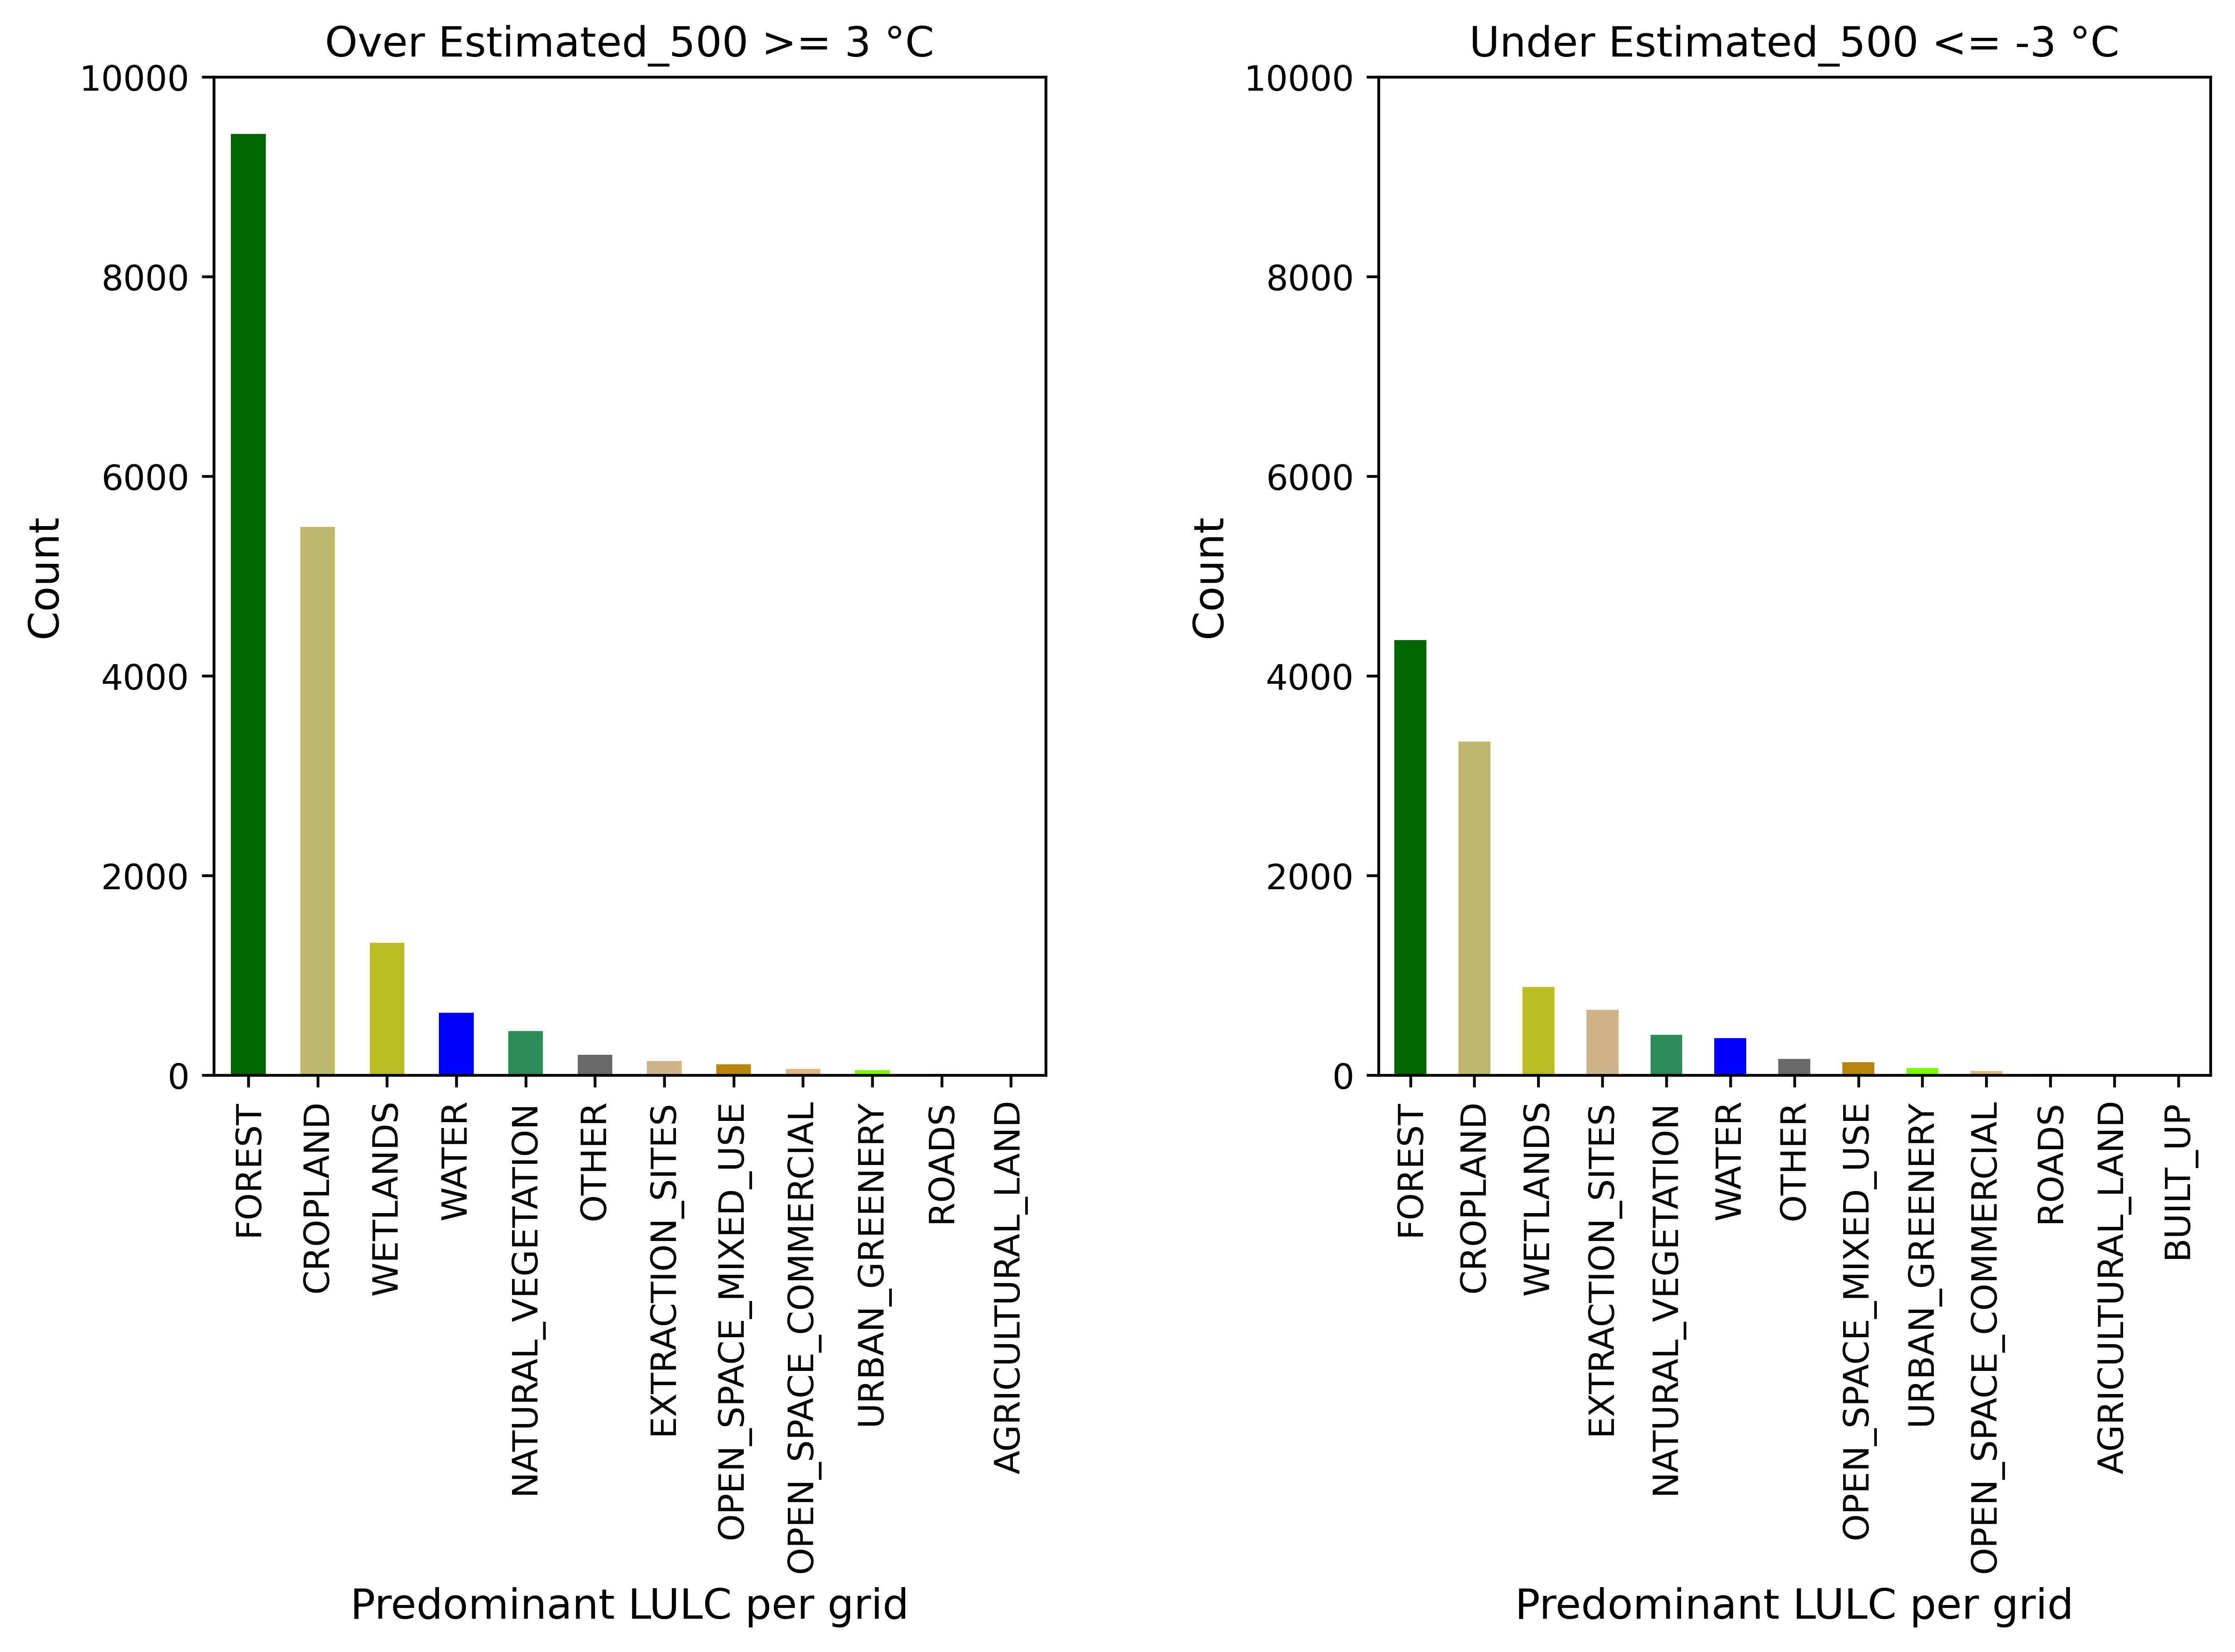

In [13]:
plt.rcParams['image.origin']






fig, axes = plt.subplots(1,2,figsize=(10,5),dpi=600)

ax1, ax2 = axes.flatten()

ax1 = data_over['pred_class'].value_counts().plot(kind='bar',ax=ax1,
                                                    color= [colors[x] for x in data_over['pred_class'].value_counts().index.tolist()],
                                                    title = 'Over Estimated_500 >= 3 °C')
ax1.set_xlabel('Predominant LULC per grid',fontsize=12)
ax1.set_ylabel('Count',fontsize=12)
ax1.set_ylim([0,10000])

ax2 = data_under['pred_class'].value_counts().plot(kind='bar',ax=ax2,
                                                     color= [colors[x] for x in data_under['pred_class'].value_counts().index.tolist()],
                                                     title = 'Under Estimated_500 <= -3 °C')
ax2.set_xlabel('Predominant LULC per grid',fontsize=12)
ax2.set_ylabel('Count',fontsize=12)
ax2.set_ylim([0,10000])



plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.8) 

